In [2]:
# actually applying class material for once

In [1]:
import pandas_datareader.data as reader
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

In [2]:
end = dt.datetime.now()
start = dt.date(end.year - 1, end.month, end.day)

In [3]:
# bonds = ['TYX', 'RTX']
# bonds_df = reader.get_data_yahoo(bonds, start, end)['Adj Close'].pct_change().cov()
# bonds_df

In [4]:
semiconductors = ['INTC', 'AMAT', 'KLAC', 'ASML', 'TSM', 'AMD', 'NVDA']
military = ['VIX', 'SPY', '^TNX', 'IRX', 'RTX', 'LMT', 'NOC', 'BA', 'TXT', 'LHX' ]
tech = ['SPY', 'QQQ', 'GOOG', 'AAPL']

In [42]:
# df = reader.get_data_yahoo(portfolio, start, end)
semiconductors_df = reader.get_data_yahoo(semiconductors, start, end)['Adj Close'] # using noob yahoo finance
diff_semi = semiconductors_df.pct_change()
# diff_semi.cov()
# diff_semi.var()
diff_semi.corr()

Symbols,INTC,AMAT,KLAC,ASML,TSM,AMD,NVDA
Symbols,,,,,,,
INTC,1.000000,0.751270,0.712051,0.698780,0.621730,0.723445,0.738151
AMAT,0.751270,1.000000,0.936054,0.878927,0.753478,0.819165,0.854223
KLAC,0.712051,0.936054,1.000000,0.866764,0.748516,0.815574,0.858731
ASML,0.698780,0.878927,0.866764,1.000000,0.753086,0.801359,0.842437
TSM,0.621730,0.753478,0.748516,0.753086,1.000000,0.701776,0.721674
AMD,0.723445,0.819165,0.815574,0.801359,0.701776,1.000000,0.894752
NVDA,0.738151,0.854223,0.858731,0.842437,0.721674,0.894752,1.000000


In [50]:
fig,ax = plt.subplots()
diff_semi.plot(ax=ax)

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Date'>

In [43]:
# Sharpe Ratio for Semiconductors
# diff_semi.head()
mean = diff_semi.mean()
# mean
std = diff_semi.std()
# std
# Sharpe = (Return - Risk Free Rate) / std
cum_returns_intc = (semiconductors_df['INTC'][-1] / semiconductors_df['INTC'][0]) -1
cum_returns_intc

-0.37465119750644427

In [44]:
std = std*np.sqrt(252)
std
std['INTC']

0.38215206967354703

In [45]:
rfr = 0.02 # tbill
# sharpe_intc = (cum_returns_intc - rfr/365) / std['INTC']
sharpe_intc = np.mean(cum_returns_intc - (rfr/365) ) / np.std(cum_returns_intc)*16
sharpe_intc

C:\Users\hello\AppData\Local\Temp\ipykernel_26020\1641112668.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe_intc = np.mean(cum_returns_intc - (rfr/365) ) / np.std(cum_returns_intc)*16


-inf

In [49]:
%matplotlib notebook
 
def visualize_correlation(ticker1, ticker2):
    df = reader.get_data_yahoo([ticker1, ticker2], dt.datetime(2020, 1, 1))
    df = df['Adj Close']
    df = df/df.iloc[0]
    fig, ax = plt.subplots()
    df.plot(ax=ax)

visualize_correlation('^GSPC', 'AMD')

<IPython.core.display.Javascript object>

In [29]:
military_df = reader.get_data_yahoo(military, start, end)['Adj Close'] # using noob yahoo finance
diff_military = military_df.pct_change()    
# diff.cov()
# diff.var()
diff_military.corr()

C:\Users\hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'VIX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'IRX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,SPY,^TNX,RTX,LMT,NOC,BA,TXT,LHX,VIX,IRX
Symbols,,,,,,,,,,
SPY,1.000000,-0.030034,0.616212,0.269284,0.280584,0.629570,0.825404,0.316079,NaN,NaN
^TNX,-0.030034,1.000000,0.020472,-0.101219,-0.069662,0.029301,0.030431,-0.102420,NaN,NaN
RTX,0.616212,0.020472,1.000000,0.681680,0.665339,0.487920,0.645217,0.653730,NaN,NaN
LMT,0.269284,-0.101219,0.681680,1.000000,0.839697,0.139556,0.315724,0.806034,NaN,NaN
NOC,0.280584,-0.069662,0.665339,0.839697,1.000000,0.129205,0.400276,0.831391,NaN,NaN
BA,0.629570,0.029301,0.487920,0.139556,0.129205,1.000000,0.659324,0.160120,NaN,NaN
TXT,0.825404,0.030431,0.645217,0.315724,0.400276,0.659324,1.000000,0.377530,NaN,NaN
LHX,0.316079,-0.102420,0.653730,0.806034,0.831391,0.160120,0.377530,1.000000,NaN,NaN
VIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Interest Rates (Federal Funds) vs Bond Yields
# do stuff on highest mortgage rates since 2006 (30-yr fixed rates in 2022)
# reader.wb.download(country=None, indicator=None, start=2003, end=2005, freq=None, errors=’warn’, **kwargs)
data = wb.download(indicator=['SL.UEM.TOTL.ZS', 'FR.INR.RINR'], country=['US'], start=1990, end=2019)
uem_data = data.unstack().T.loc['SL.UEM.TOTL.ZS']
uem_data.columns = ['US-unempl']
int_data = data.unstack().T.loc['FR.INR.RINR']
int_data.columns = ['US-int']
data = int_data.join(uem_data)
data.index = pd.to_datetime(data.index, format='%Y')




start = dt.datetime(1990, 1, 1)
end = dt.datetime(2019, 12, 31)
sp500 = reader.get_data_yahoo("^GSPC", start, end)['Adj Close']
sp500.name='S&P 500'
data = sp500.to_frame().join(data, how='outer')
print(data)

                S&P 500    US-int  US-unempl
1990-01-01          NaN  6.039749        NaN
1990-01-02   359.690002       NaN        NaN
1990-01-03   358.760010       NaN        NaN
1990-01-04   355.670013       NaN        NaN
1990-01-05   352.200012       NaN        NaN
...                 ...       ...        ...
2019-12-24  3223.379883       NaN        NaN
2019-12-26  3239.909912       NaN        NaN
2019-12-27  3240.020020       NaN        NaN
2019-12-30  3221.290039       NaN        NaN
2019-12-31  3230.780029       NaN        NaN

[7589 rows x 3 columns]


In [22]:
data = data.interpolate(method='linear')

In [23]:
data

,S&P 500,US-int,US-unempl
1990-01-01,NaN,6.039749,NaN
1990-01-02,359.690002,6.035322,NaN
1990-01-03,358.760010,6.030896,NaN
1990-01-04,355.670013,6.026469,NaN
1990-01-05,352.200012,6.022042,NaN
...,...,...,...
2019-12-24,3223.379883,3.432389,3.67
2019-12-26,3239.909912,3.432389,3.67
2019-12-27,3240.020020,3.432389,3.67
2019-12-30,3221.290039,3.432389,3.67


            S&P 500    US-int  US-unempl
S&P 500    1.000000 -0.410192  -0.453790
US-int    -0.410192  1.000000  -0.464767
US-unempl -0.453790 -0.464767   1.000000


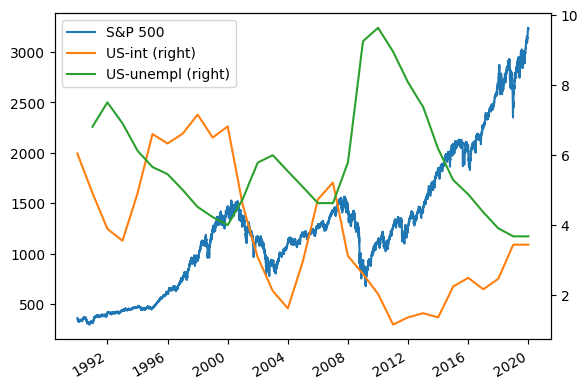

In [24]:
ax = data['S&P 500'].plot(legend=True)
ax = data[['US-int','US-unempl']].plot(ax=ax, secondary_y=True, legend=True)
print(data.corr())
plt.show()

In [28]:
gdp = wb.download(indicator='NY.GDP.MKTP.CD', country='US', start=1990, end=2019)
gdp = gdp.unstack().T.reset_index(0)
print(gdp)

country         level_0   United States
year                                   
1990     NY.GDP.MKTP.CD   5963144000000
1991     NY.GDP.MKTP.CD   6158129000000
1992     NY.GDP.MKTP.CD   6520327000000
1993     NY.GDP.MKTP.CD   6858559000000
1994     NY.GDP.MKTP.CD   7287236000000
1995     NY.GDP.MKTP.CD   7639749000000
1996     NY.GDP.MKTP.CD   8073122000000
1997     NY.GDP.MKTP.CD   8577554457000
1998     NY.GDP.MKTP.CD   9062818202000
1999     NY.GDP.MKTP.CD   9631174489000
2000     NY.GDP.MKTP.CD  10250947997000
2001     NY.GDP.MKTP.CD  10581929774000
2002     NY.GDP.MKTP.CD  10929112955000
2003     NY.GDP.MKTP.CD  11456442041000
2004     NY.GDP.MKTP.CD  12217193198000
2005     NY.GDP.MKTP.CD  13039199193000
2006     NY.GDP.MKTP.CD  13815586948000
2007     NY.GDP.MKTP.CD  14474226905000
2008     NY.GDP.MKTP.CD  14769857911000
2009     NY.GDP.MKTP.CD  14478064934000
2010     NY.GDP.MKTP.CD  15048964444000
2011     NY.GDP.MKTP.CD  15599728123000
2012     NY.GDP.MKTP.CD  16253972230000


In [29]:
sp500

Date
1990-01-02     359.690002
1990-01-03     358.760010
1990-01-04     355.670013
1990-01-05     352.200012
1990-01-08     353.790009
                 ...     
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
2019-12-31    3230.780029
Name: S&P 500, Length: 7559, dtype: float64

In [33]:
gdp = wb.download(indicator='NY.GDP.MKTP.CD', country=['NO', 'FR', 'US', 'GB', 'DK', 'DE', 'SE'], start=1990, end=2019)
gdp = gdp.unstack().T.reset_index(0)
gdp.index = pd.to_datetime(gdp.index, format='%Y')

start = dt.datetime(1990, 1, 1)
end = dt.datetime(2019, 12, 31)
sp500 = reader.get_data_yahoo("^GSPC", start, end)['Adj Close']
gdp_data = sp500.to_frame().join(gdp, how='outer')
gdp_data = gdp_data.interpolate(method='linear')
print(gdp_data.corr())

                Adj Close   Denmark    France   Germany    Norway    Sweden  \
Adj Close        1.000000  0.730632  0.675450  0.732597  0.655550  0.720730   
Denmark          0.730632  1.000000  0.996361  0.986695  0.975978  0.978908   
France           0.675450  0.996361  1.000000  0.981290  0.979646  0.974279   
Germany          0.732597  0.986695  0.981290  1.000000  0.951985  0.971899   
Norway           0.655550  0.975978  0.979646  0.951985  1.000000  0.978849   
Sweden           0.720730  0.978908  0.974279  0.971899  0.978849  1.000000   
United Kingdom   0.767002  0.957619  0.947322  0.916389  0.934686  0.933161   
United States    0.912431  0.928546  0.896279  0.920087  0.882634  0.919448   

                United Kingdom  United States  
Adj Close             0.767002       0.912431  
Denmark               0.957619       0.928546  
France                0.947322       0.896279  
Germany               0.916389       0.920087  
Norway                0.934686       0.882634  


C:\Users\hello\AppData\Local\Temp\ipykernel_26020\2233586965.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(gdp_data.corr())


In [36]:
gdp_data

,Adj Close,level_0,Denmark,France,Germany,Norway,Sweden,United Kingdom,United States
1990-01-01,NaN,NY.GDP.MKTP.CD,1.382473e+11,1.269180e+12,1.771671e+12,1.197917e+11,2.618462e+11,1.093169e+12,5.963144e+12
1990-01-02,359.690002,NaN,1.382511e+11,1.269180e+12,1.772054e+12,1.197999e+11,2.618949e+11,1.093365e+12,5.963912e+12
1990-01-03,358.760010,NaN,1.382550e+11,1.269180e+12,1.772437e+12,1.198081e+11,2.619437e+11,1.093560e+12,5.964679e+12
1990-01-04,355.670013,NaN,1.382588e+11,1.269181e+12,1.772820e+12,1.198163e+11,2.619924e+11,1.093756e+12,5.965447e+12
1990-01-05,352.200012,NaN,1.382627e+11,1.269181e+12,1.773203e+12,1.198245e+11,2.620412e+11,1.093951e+12,5.966215e+12
...,...,...,...,...,...,...,...,...,...
2019-12-24,3223.379883,NaN,3.475613e+11,2.728870e+12,3.888327e+12,4.049414e+11,5.338795e+11,2.878674e+12,2.137257e+13
2019-12-26,3239.909912,NaN,3.475613e+11,2.728870e+12,3.888327e+12,4.049414e+11,5.338795e+11,2.878674e+12,2.137257e+13
2019-12-27,3240.020020,NaN,3.475613e+11,2.728870e+12,3.888327e+12,4.049414e+11,5.338795e+11,2.878674e+12,2.137257e+13
2019-12-30,3221.290039,NaN,3.475613e+11,2.728870e+12,3.888327e+12,4.049414e+11,5.338795e+11,2.878674e+12,2.137257e+13


In [ ]:
ax = gdp_data['S&P 500'].plot(legend=True)
ax = gdp_data[['US-int','US-unempl']].plot(ax=ax, secondary_y=True, legend=True)
print(gdp_data.corr())
plt.show()